In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.linear_model import LogisticRegression

In [38]:
iris = datasets.load_iris()

X = iris.data
y = iris.target

data = {
    "sepal_length": X[:, 0],
    "sepal_width": X[:, 1],
    "petal_length": X[:, 2],
    "petal_width": X[:, 3],
    "target": y,
}

target_names = {
    0: iris.target_names[0],
    1: iris.target_names[1],
    2: iris.target_names[2],
}

iris = pd.DataFrame(data)
iris["species"] = iris["target"].map(target_names)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


## Decision Boundary

In [81]:
X = iris["petal_width"].values.reshape(-1, 1)
y = (iris["species"] == "virginica").values.astype(int)

In [82]:
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

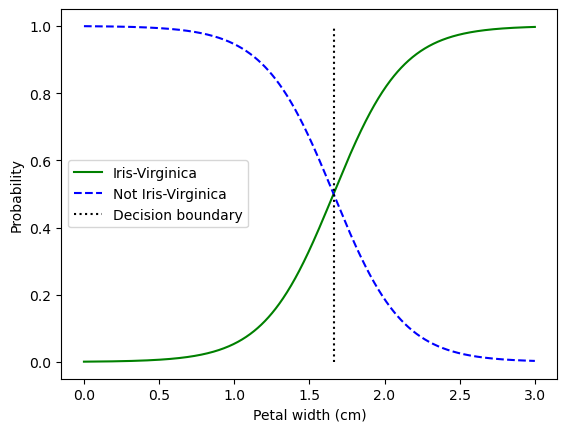

In [83]:
X_new = np.linspace(start=0, stop=3, num=1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

decision_boundary = X_new[y_proba[:, 1] >= 0.5][0, 0]

plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")
plt.plot([decision_boundary, decision_boundary], [0, 1], "k:", label="Decision boundary")
plt.xlabel("Petal width (cm)")
plt.ylabel("Probability")
plt.legend(loc="center left")
plt.show()

## Softmax Regression

In [86]:
X = iris[["petal_length", "petal_width"]].values
y = iris["target"].values

In [87]:
softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial')

In [92]:
X_new = [[5, 2]]
y_pred = softmax_reg.predict(X_new)
y_proba = softmax_reg.predict_proba(X_new)

print(f"Prediction: {target_names[y_pred[0]]}")
print(f"Probabilities: {y_proba[0][0] * 100:.2f}%, {y_proba[0][1] * 100:.2f}%, {y_proba[0][2] * 100:.2f}%")

Prediction: virginica
Probabilities: 0.00%, 5.75%, 94.25%
